In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import unicodedata
import sys
import re
import datetime
import numpy as np

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [ ]:
def getBoosterVersion(data):
  for x in data['rocket']:
    if x:
      response = requests.get("https://api.spacexdata.com/v4/rockets/" + str(x)).json()
      BoosterVersion.append(response['name'])

In [ ]:
def getLaunchSite(data):
  for x in data['launchpad']:
    if x:
      response = requests.get("https://api.spacexdata.com/v4/launchpads/" +str(x)).json()
      Latitude.append(response['latitude'])
      Longitude.append(response['longitude'])
      LaunchSite.append(response['region'])

In [ ]:
def getPayloadData(data):
  for load in data['payloads']:
    if load:
      response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
      PayloadMass.append(response['mass_kg'])
      Orbit.append(response['orbit'])

In [ ]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [ ]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [ ]:
response=requests.get(spacex_url)
response.status_code

200

In [ ]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [ ]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [ ]:
response = requests.get(static_json_url)

In [ ]:
response.status_code

200

In [ ]:
static_json_df = response.json()

In [ ]:
data=pd.json_normalize(static_json_df)

In [ ]:
data.head()

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [ ]:
data = data[['rocket','payloads','launchpad','cores','flight_number','date_utc']]

data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

data['date'] = pd.to_datetime(data['date_utc']).dt.date

data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [ ]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [ ]:
getBoosterVersion(data)

In [ ]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [ ]:
getLaunchSite(data)

In [ ]:
getPayloadData(data)

In [ ]:
getCoreData(data)

In [ ]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [ ]:
launch_df=pd.DataFrame([launch_dict])

In [ ]:
launch_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,"[1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106]","[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Marshall Islands, Marshall Islands, Marshall Islands, Marshall Islands, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida,

In [ ]:
data_falcon9 = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,"[1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106]","[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Marshall Islands, Marshall Islands, Marshall Islands, Marshall Islands, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida,

In [ ]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,"[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Marshall Islands, Marshall Islands, Marshall Islands, Marshall Islands, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida, California, Florida, California, Florida, Florida, Florida, California, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida, California, Florida, California, Florida, Florida, California, Florida, Florida, Florida, California, Flori

In [ ]:
data_falcon9.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,0
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [ ]:
# Calculate the mean value of PayloadMass column
PayloadMass = pd.DataFrame(data_falcon9['PayloadMass'].values.tolist()).mean(1)
print(PayloadMass)

0    5919.165341
dtype: object


In [ ]:
rows = data_falcon9['PayloadMass'].values.tolist()[0]

df_rows = pd.DataFrame(rows)
df_rows = df_rows.replace(np.nan, PayloadMass)

data_falcon9['PayloadMass'][0] = df_rows.values
data_falcon9

<ipython-input-30-5d343cb6373e>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_falcon9['PayloadMass'][0] = df_rows.values


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,"[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[[20.0], [5919.16534090909], [165.0], [200.0], [5919.16534090909], [525.0], [677.0], [500.0], [3170.0], [3325.0], [2296.0], [1316.0], [4535.0], [4428.0], [2216.0], [2395.0], [570.0], [1898.0], [4707.0], [2477.0], [2034.0], [553.0], [5271.0], [3136.0], [4696.0], [3100.0], [2257.0], [4600.0], [5500.0], [9600.0], [2490.0], [5600.0], [5300.0], [5919.16534090909], [6070.0], [2708.0], [3669.0], [9600.0], [6761.0], [2910.0], [475.0], [4990.0], [9600.0], [5200.0], [3700.0], [2205.0], [9600.0], [5919.16534090909], [4230.0], [6092.0], [9600.0], [2760.0], [350.0], [3750.0], [5383.85], [2410.0], [7076.0], [9600.0], [5800.0], [7060.0], [2800.0], [3000.0], [4000.0], [2573.0], [4400.0], [9600.0], [12259.0], [2482.0], [13200.0], [1425.0], [2227.7], [6500.0], [15600.0], [5000.0], [6800.0], [15600.0], [5919.16534090909], [15600.0], [15600.0], [1977.0], [15600.0], [15600.0], [9525.0], [15600.0], [15600.0], [3880.0], [5919.16534090909], [15600.0], [1600.0], [15600.0], [15600.0], [15600.0], [15600.0], [3681.0]]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Marshall Islands, Marshall Islands, Marshall Islands, Marshall Islands, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, Florida, California, Florida, Florida, Florida, Florida, Fl

In [ ]:
landing_rows = data_falcon9['LandingPad'].values.tolist()[0]
landing_rows = pd.DataFrame(landing_rows)
landing_rows.isnull().sum()

,0
0,30


In [ ]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

In [ ]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    colunm_name = ' '.join(row.contents)

    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name

In [ ]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [ ]:

html_data = requests.get(static_url)
html_data.status_code

200

In [ ]:
soup = bs(html_data.text, 'html.parser')

In [ ]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [ ]:
html_tables = soup.find_all('table')

In [ ]:
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [ ]:
column_names = []

element = soup.find_all('th')
for row in range(len(element)):
    try:
        name = extract_column_from_header(element[row])
        if (name is not None and len(name) > 0):
            column_names.append(name)
    except:
        pass

In [ ]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'N/A', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'FH 2', 'FH 3', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Date and time ( )', 'Launch site', 'Payload', '

In [ ]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [ ]:
extracted_row = 0
#Extract each table
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element
        row=rows.find_all('td')
        #if it is number save cells in a dictonary
        if flag:
            extracted_row += 1
            # Flight Number value
            launch_dict['Flight No.'].append(flight_number)
            #print(flight_number)
            datatimelist=date_time(row[0])

            # Date value
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            #print(date)

            # Time value
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            #print(time)

            # Booster version
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict['Version Booster'].append(bv)
            #print(bv)

            # Launch Site
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            #print(launch_site)

            # Payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            #print(payload)

            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            #print(payload)

            # Orbit
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            #print(orbit)

            # Customer
            # Check if row[6] and row[6].a exist before accessing .string
            customer = row[6].a.string if row[6] and row[6].a else None
            launch_dict['Customer'].append(customer)
            #print(customer)

            # Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            #print(launch_outcome)

            # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)

In [ ]:
headings = []
for key,values in dict(launch_dict).items():
    if key not in headings:
        headings.append(key)
    if values is None:
        del launch_dict[key]

def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

pad_dict_list(launch_dict,0)

df = pd.DataFrame(launch_dict)
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


In [ ]:
df.to_csv('spacex_web_scraped.csv', index=False)

In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [ ]:
df.isnull().sum()/df.count()*100

,0
FlightNumber,0.000
Date,0.000
BoosterVersion,0.000
PayloadMass,0.000
Orbit,0.000
LaunchSite,0.000
Outcome,0.000
Flights,0.000
GridFins,0.000
Reused,0.000


In [ ]:
df.dtypes

,0
FlightNumber,int64
Date,object
BoosterVersion,object
PayloadMass,float64
Orbit,object
LaunchSite,object
Outcome,object
Flights,int64
GridFins,bool
Reused,bool


In [ ]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [ ]:
df['Orbit'].value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
HEO,1
ES-L1,1


In [ ]:
landing_outcomes = df['Outcome'].value_counts()

In [ ]:
for i,outcome in (landing_outcomes.items()):
  print(i,outcome)

True ASDS 41
None None 19
True RTLS 14
False ASDS 6
True Ocean 5
False Ocean 2
None ASDS 2
False RTLS 1


In [ ]:
bad_outcomes=set(landing_outcomes.keys()[[1,2,3,4,5,6,7]])
bad_outcomes

{'False ASDS',
 'False Ocean',
 'False RTLS',
 'None ASDS',
 'None None',
 'True Ocean',
 'True RTLS'}

In [ ]:
landing_class=[]
for item in df['Outcome']:
  temp_landing_class = 0 if item in bad_outcomes else 1
  landing_class.append(temp_landing_class)

landing_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

In [ ]:
falcon9_df = df[df["BoosterVersion"] != "Falcon 1"]
falcon9_df.shape

(90, 17)

In [ ]:
df["Class"] = landing_class
df[["Class"]].head(20)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
df['Class'].mean()

np.float64(0.45555555555555555)

In [ ]:
df.to_csv("dataset_part_22.csv", index=False)

In [ ]:
%load_ext sql

In [ ]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [ ]:
%sql sqlite:///my_data1.db

In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [ ]:
%%sql
SELECT * FROM SPACEXTBL LIMIT 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [ ]:
%%sql
SELECT DISTINCT Launch_Site from SPACEXTBL

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [ ]:
%%sql
SELECT * from SPACEXTBL WHERE Launch_Site LIKE 'CCA%' LIMIT 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [ ]:
%%sql
SELECT SUM(PAYLOAD_MASS__KG_) as SUM_PAYLOAD FROM SPACEXTBL WHERE Customer='NASA (CRS)' LIMIT 5

 * sqlite:///my_data1.db
Done.


SUM_PAYLOAD
45596


In [ ]:
%%sql
SELECT AVG(PAYLOAD_MASS__KG_) as AVG_PAYLOAD FROM SPACEXTBL WHERE Booster_Version LIKE "F9 v1.1%" LIMIT 5

 * sqlite:///my_data1.db
Done.


AVG_PAYLOAD
2534.6666666666665


In [ ]:
%%sql
SELECT Date FROM SPACEXTBL WHERE Landing_Outcome="Success (ground pad)" ORDER BY Date DESC LIMIT 1

 * sqlite:///my_data1.db
Done.


Date
2018-01-08


In [ ]:
%%sql
SELECT Booster_Version FROM SPACEXTBL WHERE Landing_Outcome="Success (drone ship)" and PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [ ]:
%%sql
SELECT COUNT(Mission_Outcome)
AS Success_missions
FROM SPACEXTBL
WHERE Mission_Outcome LIKE '%Success%'

 * sqlite:///my_data1.db
Done.


Success_missions
100


In [ ]:
%%sql
SELECT COUNT(Mission_Outcome)
AS Failure_missions
FROM SPACEXTBL
WHERE Mission_Outcome LIKE '%Failure%'

 * sqlite:///my_data1.db
Done.


Failure_missions
1


In [ ]:
%%sql
SELECT  Booster_Version, PAYLOAD_MASS__KG_
FROM SPACEXTBL
WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL);

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


In [ ]:
%%sql

SELECT substr(Date, 6, 2) as Month, Booster_Version, Landing_Outcome, Launch_Site
FROM SPACEXTBL
WHERE Landing_Outcome = 'Failure (drone ship)' AND substr(Date, 0, 5) = '2015'

 * sqlite:///my_data1.db
Done.


Month,Booster_Version,Landing_Outcome,Launch_Site
01,F9 v1.1 B1012,Failure (drone ship),CCAFS LC-40
04,F9 v1.1 B1015,Failure (drone ship),CCAFS LC-40


In [ ]:
%%sql
SELECT Landing_Outcome, COUNT(Landing_Outcome) AS Number
FROM SPACEXTBL
WHERE Date
BETWEEN '20100604' and '20170320'
GROUP BY Landing_Outcome
ORDER BY Number
DESC

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Number
Success (drone ship),12
No attempt,12
Success (ground pad),8
Failure (drone ship),5
Controlled (ocean),4
Uncontrolled (ocean),2
Precluded (drone ship),1


In [ ]:
import requests
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the CSV file
response = requests.get(URL)
response.raise_for_status()  # Raise an error for bad responses

# Convert to DataFrame
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)

# Show the first 5 rows
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


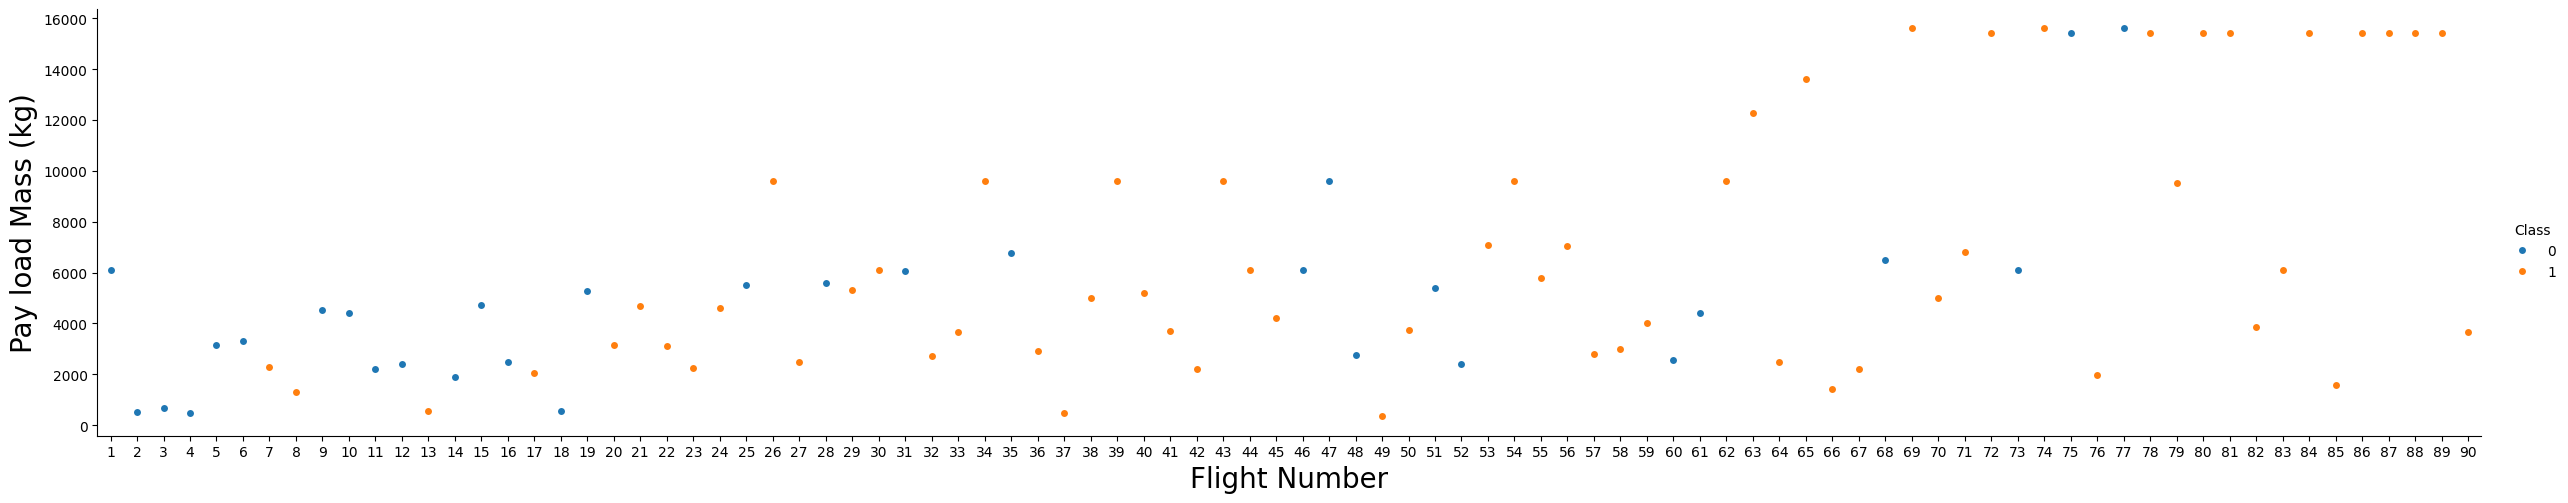

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

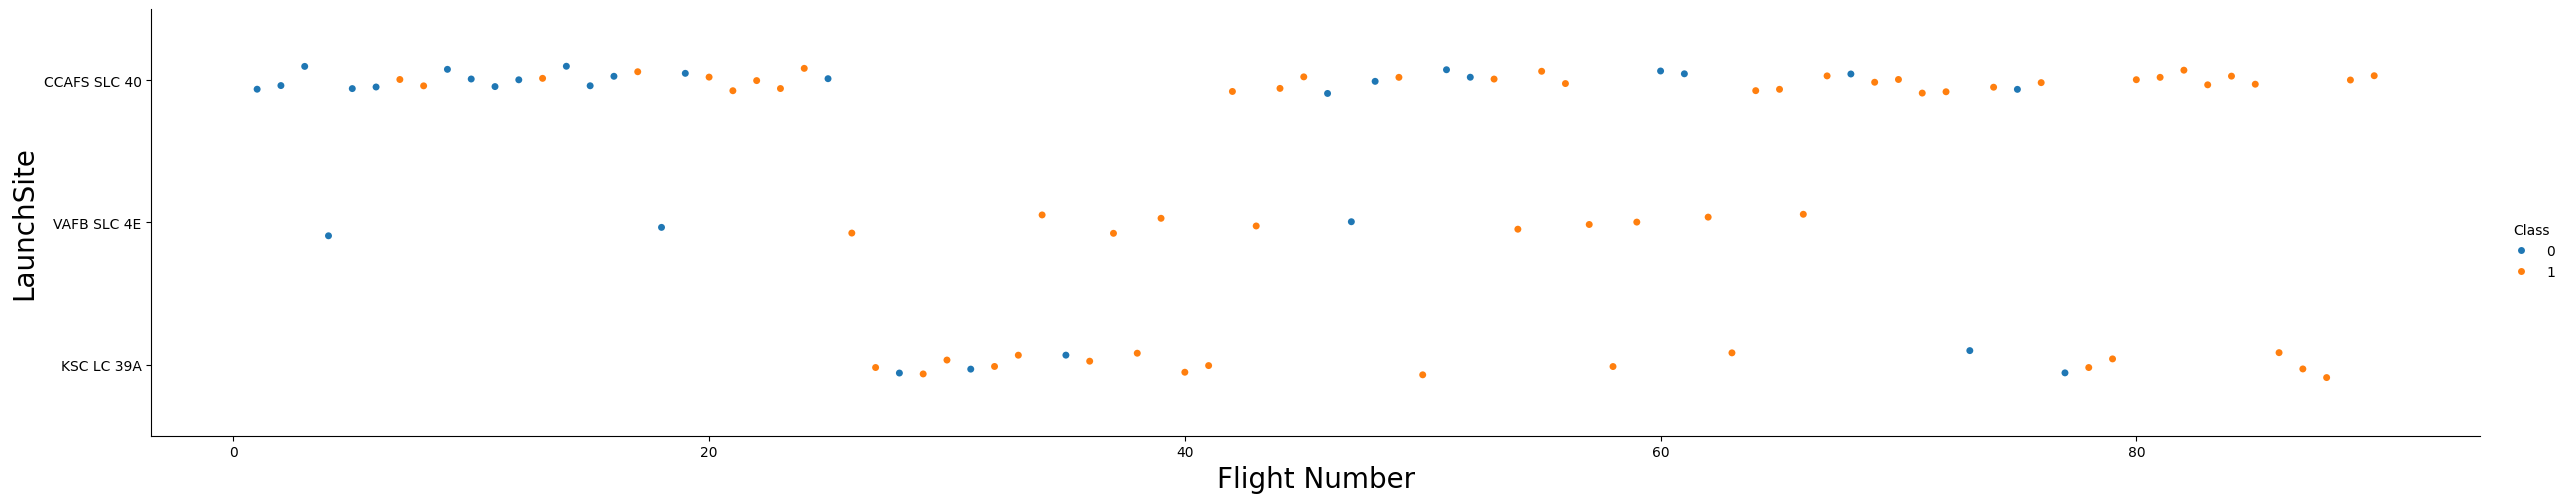

In [ ]:
sns.catplot(x='FlightNumber',y='LaunchSite',hue='Class',data=df,aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

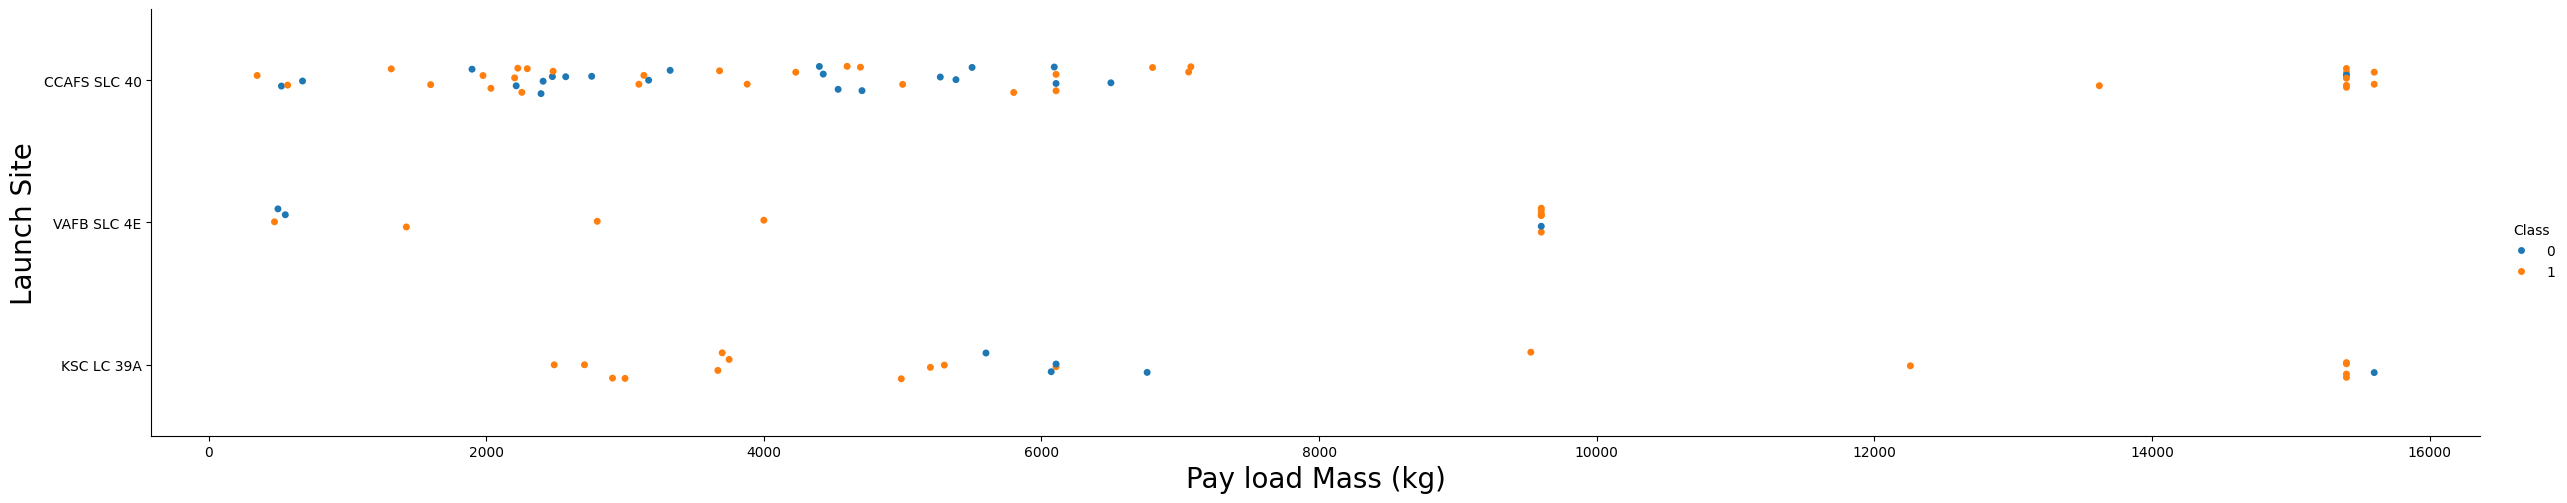

In [ ]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

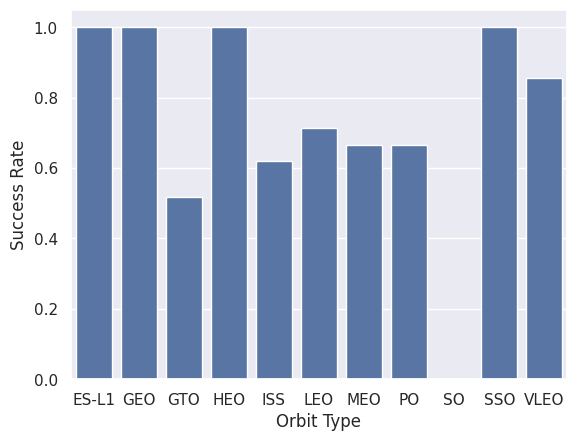

In [ ]:
sns.set()
orbit_type = df.groupby('Orbit').mean('Class')
orbit_type = orbit_type.reset_index()
sns.barplot(data = orbit_type, y= 'Class', x= 'Orbit')

plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()

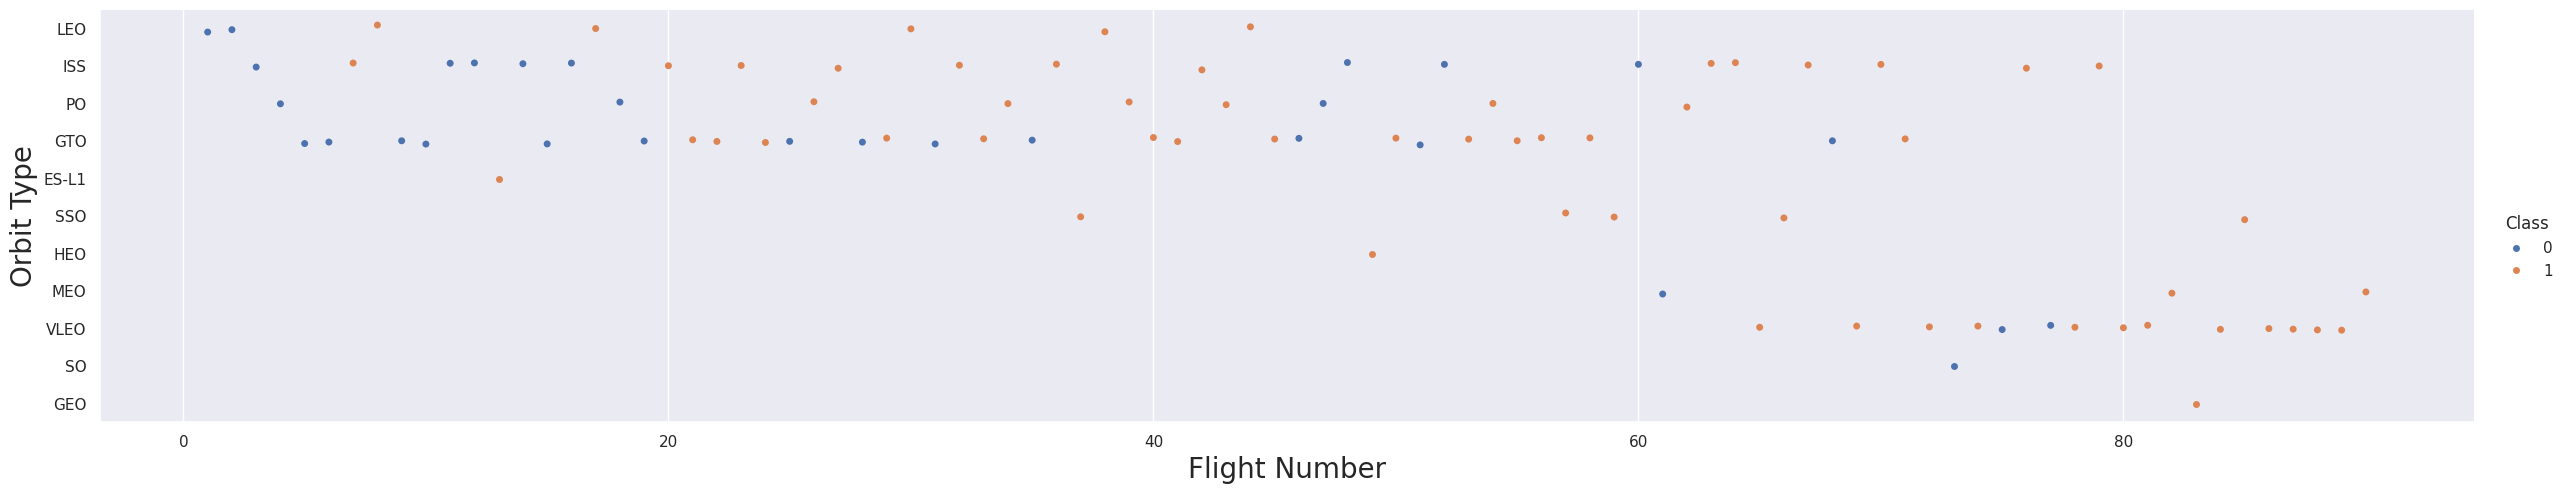

In [ ]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

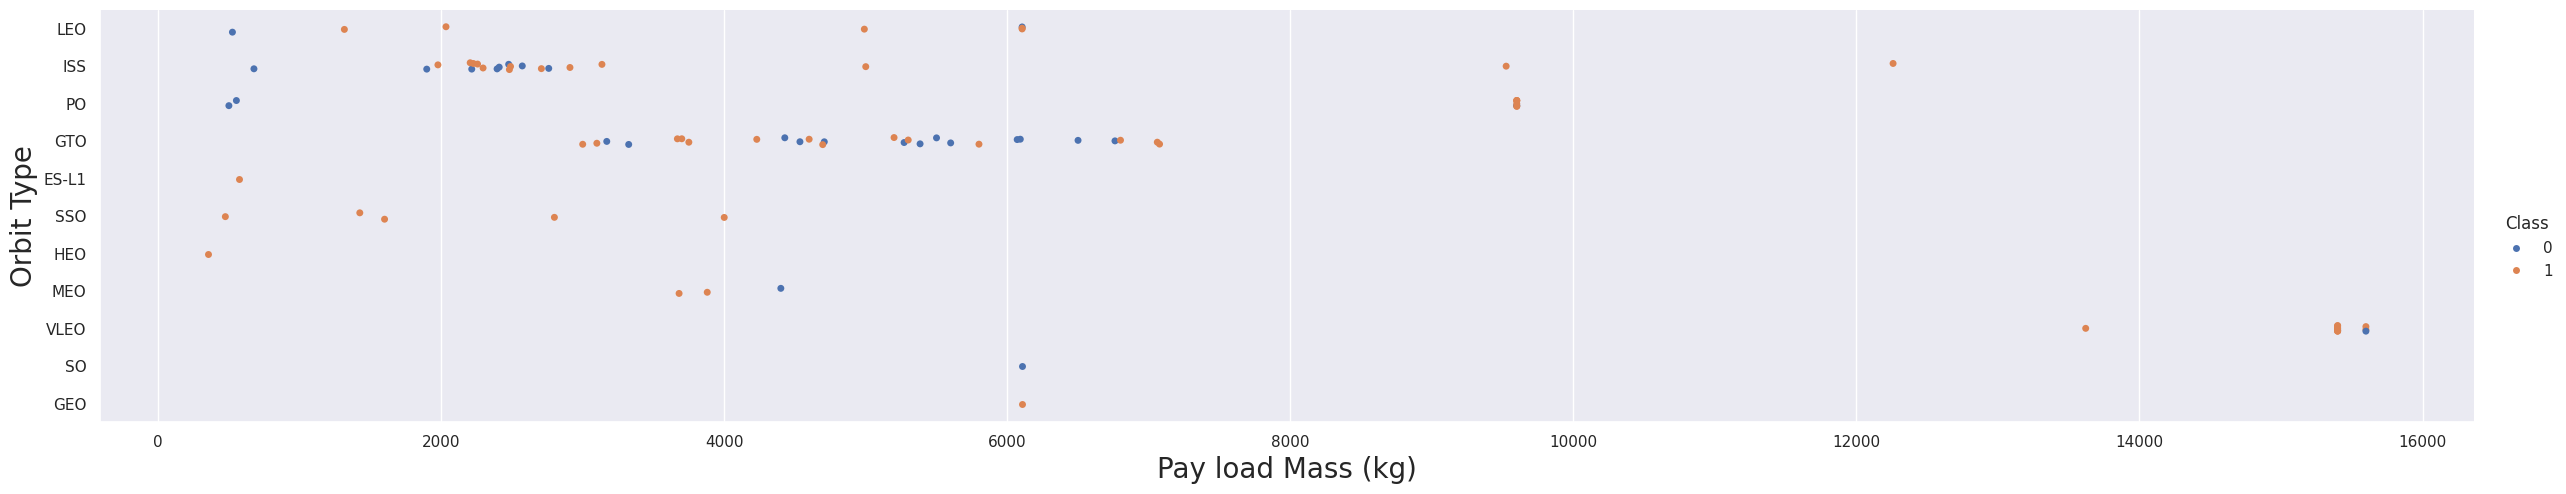

In [ ]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

In [ ]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [ ]:
Extract_year(df['Date'])

['2010',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020']

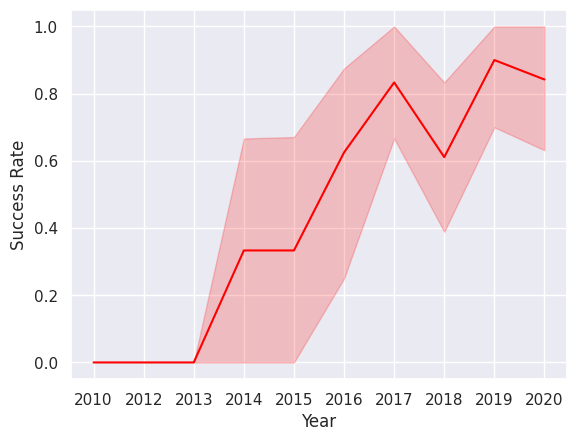

In [ ]:
sns.lineplot(data = df, x = year, y= 'Class', color='red')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
features_one_hot = pd.get_dummies(features)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
features_one_hot = features_one_hot.astype('float')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features_one_hot.shape

(90, 80)

In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def confusion_matrix(y,y_predict):
  from sklearn.metrics import confusion_matrix

  cm=confusion_matrix(y,y_predict)
  ax=plt.subplot()
  sns.heatmap(cm,annot=True,ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
  plt.show()

In [ ]:
import io
import requests  # Import the requests library instead of fetch

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Use requests.get to fetch the data instead of fetch
resp1 = requests.get(URL1)
# Check if the request was successful
resp1.raise_for_status()
# Access the content of the response
text1 = io.BytesIO(resp1.content)
data = pd.read_csv(text1)

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# Use requests.get to fetch the data instead of fetch
resp2 = requests.get(URL2)
# Check if the request was successful and raise an exception if not
resp2.raise_for_status()
# Access the content of the response
text2 = io.BytesIO(resp2.content)
X = pd.read_csv(text2)

In [ ]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

In [ ]:
# target data as numpy array
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
transform=preprocessing.StandardScaler()
X=transform.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
Y_test.shape

(18,)

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     # 'max_features': ['auto', 'sqrt'],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, param_grid= parameters, cv= 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8625


In [ ]:
tree_cv.score(X_test, Y_test)

0.5555555555555556

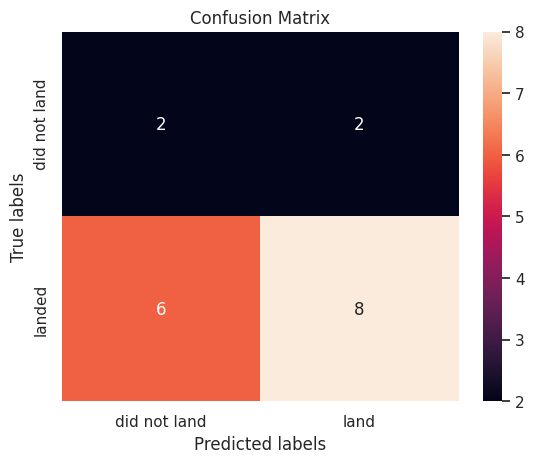

In [ ]:
yhat = tree_cv.predict(X_test)
confusion_matrix(Y_test,yhat)

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, param_grid= parameters, cv= 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8446428571428569


In [ ]:
knn_cv.score(X_test, Y_test)

0.9444444444444444

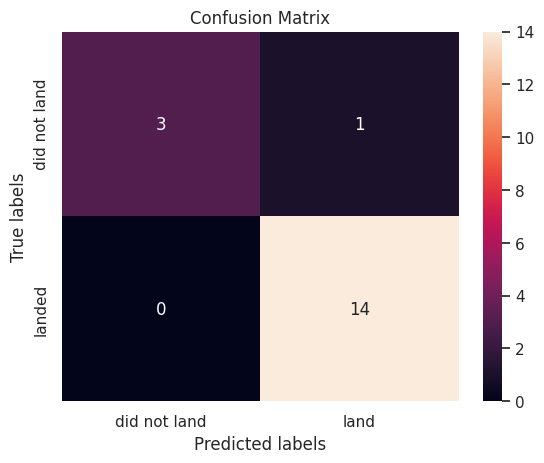

In [ ]:
yhat = knn_cv.predict(X_test)
confusion_matrix(Y_test,yhat)

Text(0.5, 1.0, 'Accuracy performance of classification models')

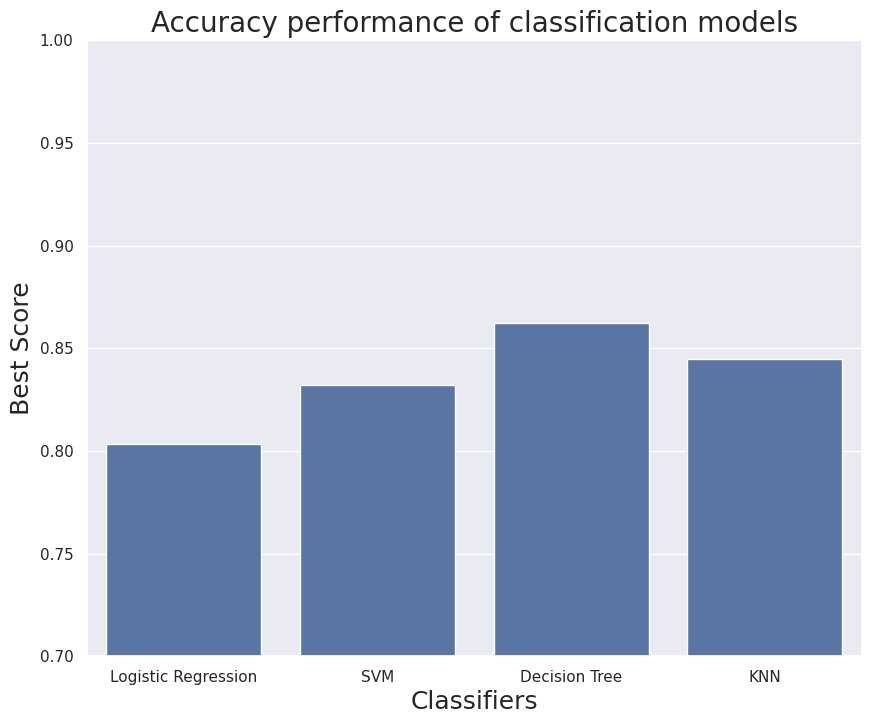

In [ ]:
sns.set()
best_scores = [tree_cv.best_score_, knn_cv.best_score_]
classifiers = ['Decision Tree', 'KNN']

plt.figure(figsize=(10,8))
sns.barplot(x=classifiers, y=best_scores)
plt.ylim(0.7,1)

plt.xlabel('Classifiers', fontsize = 18)
plt.ylabel('Best Score', fontsize = 18)
plt.title('Accuracy performance of classification models', fontsize = 20)